# Loan Approval System 

In this notebook, I am going to show you that how different ML & DL models   
perform on a credit risk modeling dataset, where we will predict which of the customers will have their loan approved.

## About dataset 

*The dataset has 614 rows and 13 different features, including the **target variable(Loan_Status)**. The data contains following features in it:* 



1.   **Loan_ID**: A unique loan id
2.   **Gender**: Male/Female
3.   **Married:**Yes/No
4.   **Dependents:**Number of poeple depending on applicant
5.   **Education:**Applicant's education--Graduate/Not Gradudate
6.   **Self_Employed:**Yes/No
7.   **AppicantIncome:** Income of applicant($)

8.   **CoapplicantIncome:**Income of co-applicant($)

9.   **LoanAmount:**Loan amount($ thousands)
10.  **Loan_Amount_Term**:Term for borrowing money(weeks)
11.  **Credit_History:**Applicant's credit history 
12.  **Property_Area:**Urban/Rural/Semi
13.  **Loan_Status:**Loan Approved (Yes/No)






## Importing Libraries 

In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [390]:
data = pd.read_csv("train_loan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Explatory Data Analysis 

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [175]:
data.isnull().count()

Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
dtype: int64

In [176]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [177]:
data.shape

(614, 13)

In [178]:
data.duplicated().count()

614

In [179]:
data.drop_duplicates(inplace = True)

#### lets check, what is the percenatage of data approval 

In [180]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [181]:
approved =(data.Loan_Status.value_counts()[0]/data.shape[0])*100
rejected =(data.Loan_Status.value_counts()[1]/data.shape[0])*100
print(approved)
print(rejected)

68.72964169381108
31.27035830618892


people whose loan has been approved: 68.72964169381108
people whose loan has been rejected: 31.27035830618892


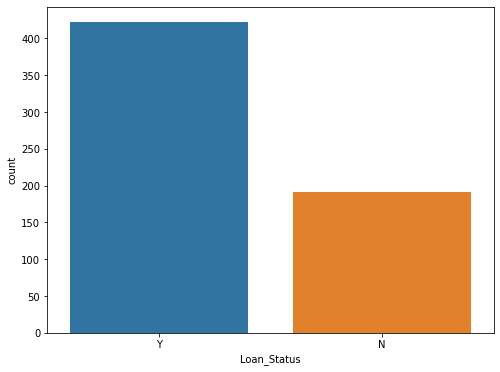

In [182]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x = "Loan_Status")
print("people whose loan has been approved:", approved)
print("people whose loan has been rejected:", rejected)

#### lets check why most of the people get approved their loan

In [183]:
data.corr()*100 # applicant income playing very important role

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,100.000000,-11.660458,57.090904,-4.530609,-1.471488
CoapplicantIncome,-11.660458,100.000000,18.861940,-5.987801,-0.205628
LoanAmount,57.090904,18.861940,100.000000,3.944725,-0.843277
Loan_Amount_Term,-4.530609,-5.987801,3.944725,100.000000,0.147011
Credit_History,-1.471488,-0.205628,-0.843277,0.147011,100.000000


D:\Anaconda setup\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

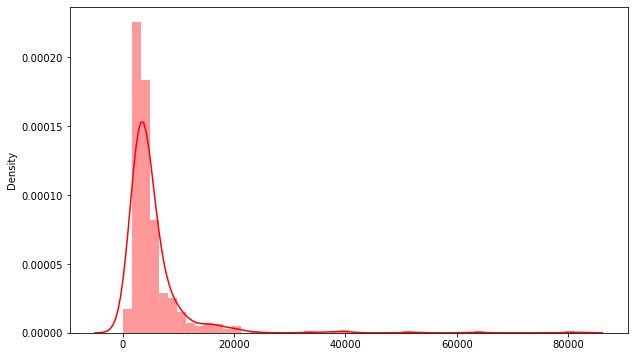

In [184]:
plt.figure(figsize=(10,6))
sns.distplot(x= data["ApplicantIncome"], color="red" )  # we can see most of the of the people who have 0 to 2000$ income level they got loan approval 

In [185]:
l_aprvd = data[data["Loan_Status"]=="Y"]



D:\Anaconda setup\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

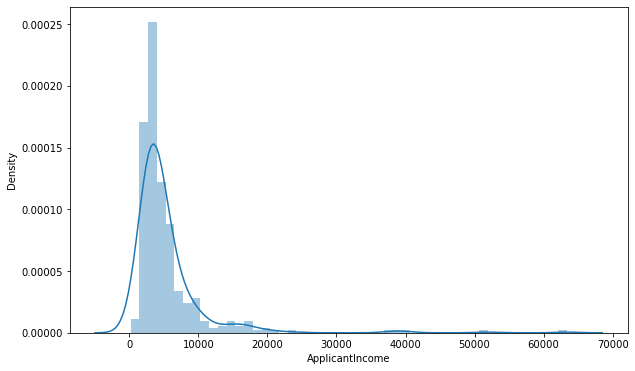

In [186]:
plt.figure(figsize= (10,6))
sns.distplot(l_aprvd["ApplicantIncome"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

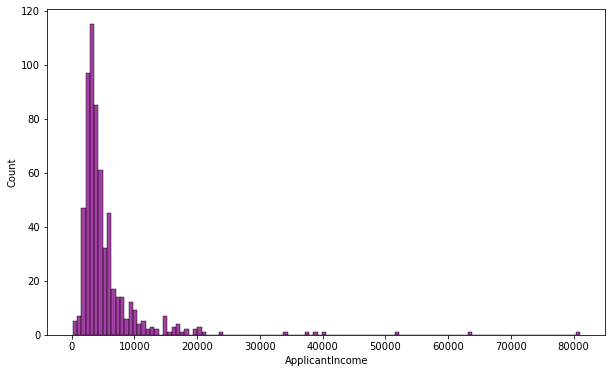

In [187]:
plt.figure(figsize=(10,6))
sns.histplot(x= data["ApplicantIncome"], color="purple" )  # we can see most of the of the people who have 0 to 2000$ income level they got loan approval 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

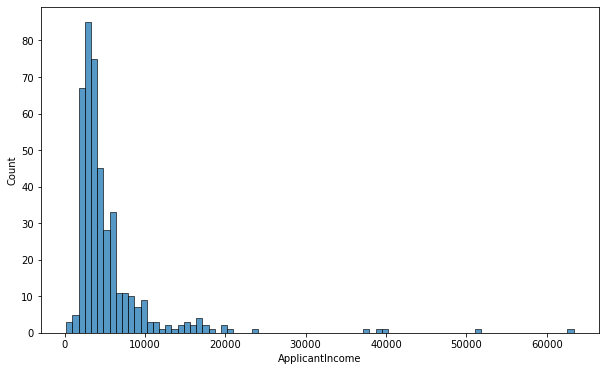

In [188]:
plt.figure(figsize= (10,6))
sns.histplot(l_aprvd["ApplicantIncome"])

### We concluded that most of the people have income between 0 to 2000$ 

In [189]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

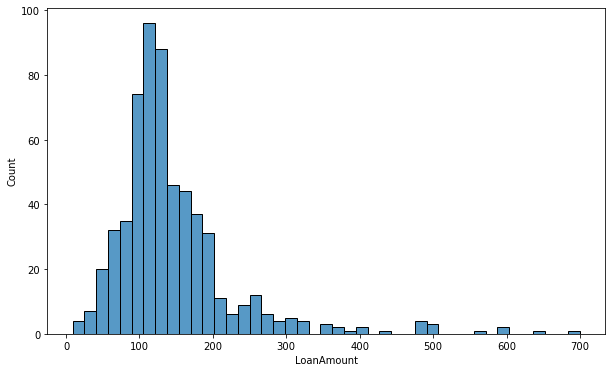

In [190]:
plt.figure(figsize=(10,6))
sns.histplot(data["LoanAmount"])    # loan approved who are asking from 10K to 200K $ 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

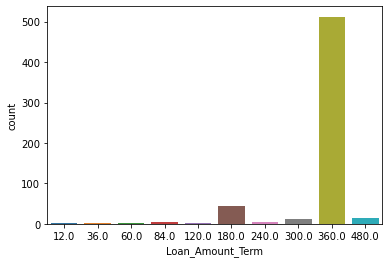

In [191]:
sns.countplot(data = data, x = "Loan_Amount_Term")  # mostly people ask for 360 weeks 

<Figure size 720x576 with 0 Axes>

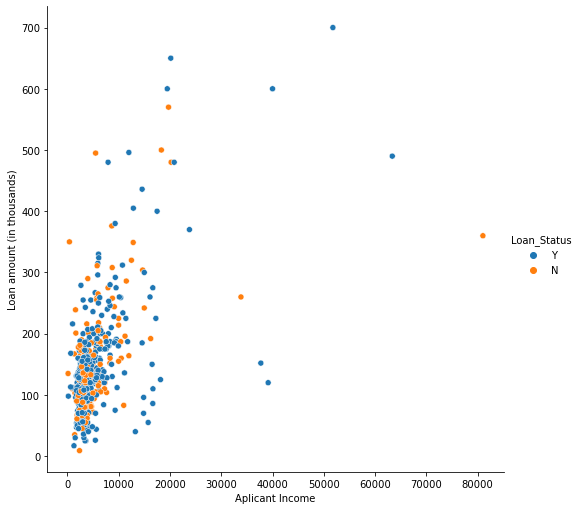

In [192]:
plt.figure(figsize=(10,8))
sns.relplot(x= "ApplicantIncome",y = "LoanAmount", hue = "Loan_Status", data = data, height = 7.0)
plt.xlabel("Aplicant Income")
plt.ylabel("Loan amount (in thousands)")
plt.show()

In [193]:
m_l_a = ((l_aprvd[l_aprvd["Gender"] == "Male"]).count()[1]/612)*100
f_l_a = 100-m_l_a

Proportion of loan approval in male: 55.392156862745104
Proportion of loan approval in female: 44.607843137254896


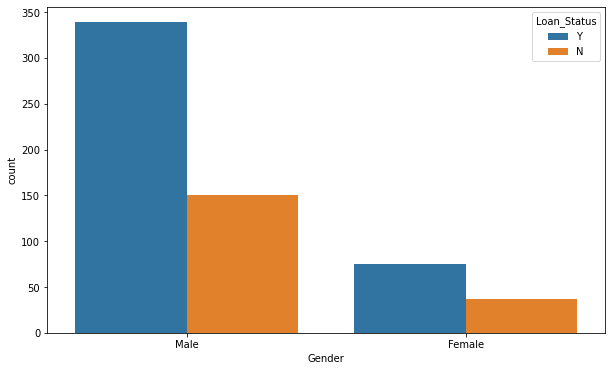

In [194]:
plt.figure(figsize =(10,6))
sns.countplot(x="Gender", data = data, hue="Loan_Status")
print("Proportion of loan approval in male:" , m_l_a)
print("Proportion of loan approval in female:" , f_l_a)

In [195]:
data[data["ApplicantIncome"] == 81000]     

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


### here we can see that people who have got approved their loan is between below 20K and amount loan below 300K

In [209]:
mar_ap = ((l_aprvd[l_aprvd["Married"] == "Yes"]).count()[2]/l_aprvd.count()[2])*100
mar_nap = 100 - mar_ap
mar_nap

31.980906921241044

In [225]:
nmarr_ap = (l_aprvd[l_aprvd["Married"] == "No"].count()[2]/l_aprvd.count()[2])*100
nmarr_nap = 100-nmarr_ap
nmarr_nap

68.01909307875896

134

Those who are married and got loan approved: 68.01909307875896
Those who are married and do not get loan approved: 31.980906921241044
Those who are not married but get loan approved: 31.980906921241047
Those who are not married and also do not get loan approved: 68.01909307875896


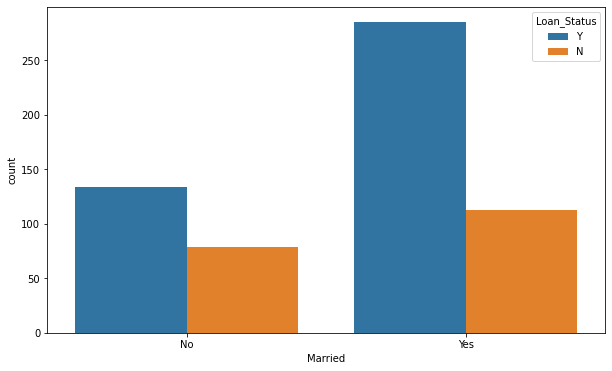

In [236]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Married", hue = "Loan_Status")
print("Those who are married and got loan approved:", mar_ap)
print("Those who are married and do not get loan approved:", mar_nap)
print("Those who are not married but get loan approved:", nmarr_ap)
print("Those who are not married and also do not get loan approved:", nmarr_nap)


In [229]:
l_aprvd["Married"].value_counts()

Yes    285
No     134
Name: Married, dtype: int64

### if you are married you have more chances to get loan approved 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

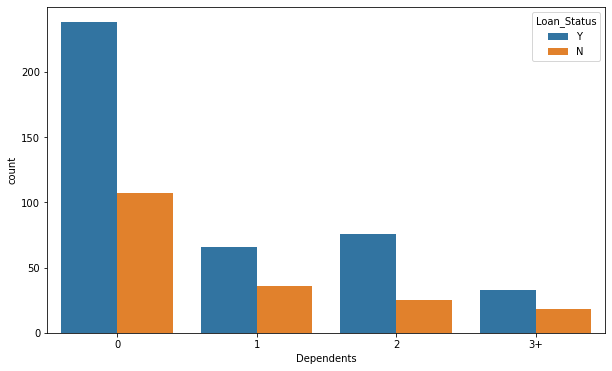

In [235]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Dependents", hue = "Loan_Status")

### Having less dependent then more chances to get loan approved

<AxesSubplot:xlabel='Education', ylabel='count'>

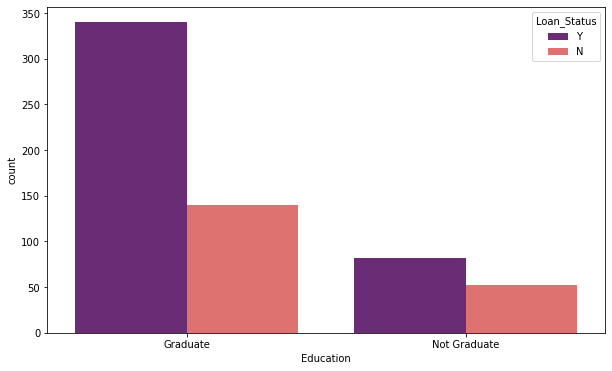

In [242]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Education", hue = "Loan_Status",palette='magma')

#### Graduated people have more chances 

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

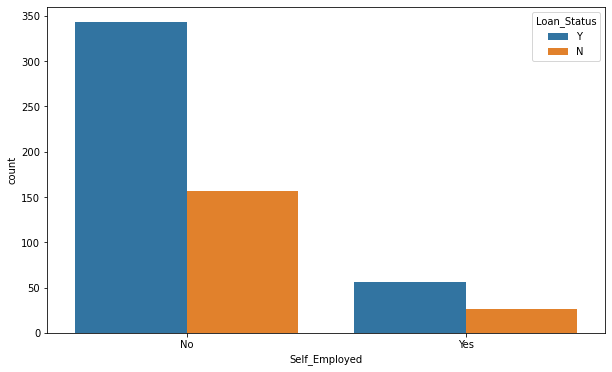

In [243]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Self_Employed", hue = "Loan_Status")

### other than self employeed people have more chances 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

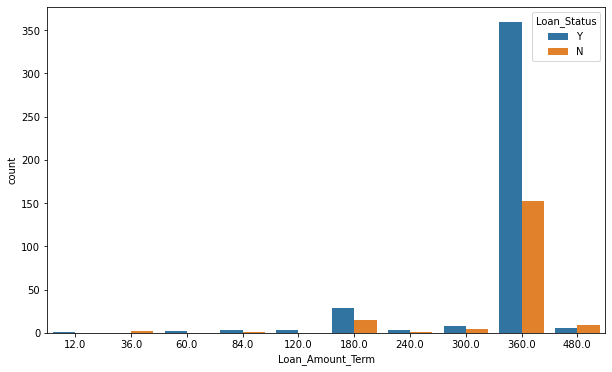

In [244]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Loan_Amount_Term", hue = "Loan_Status")

### 360 weeks are best  time period to get approve your loan 

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

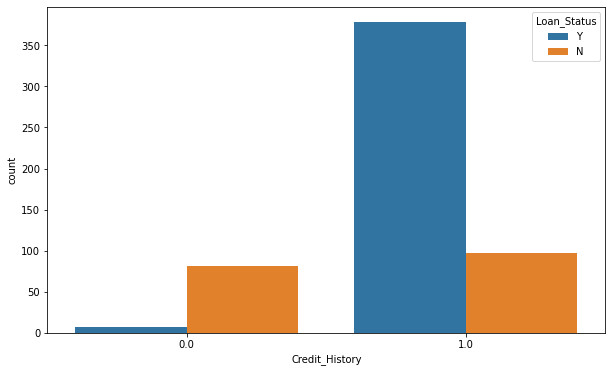

In [246]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Credit_History", hue = "Loan_Status")

#### No chance for to get approval if your credit history is not clear 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

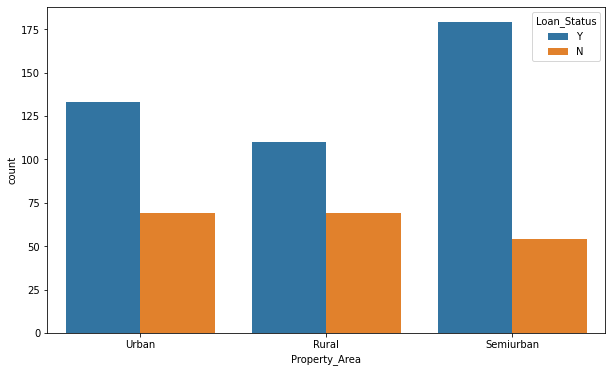

In [247]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Property_Area", hue = "Loan_Status")

### Semiurban area have moe chances to get loan approved 

# Data Preprocessing

<AxesSubplot:>

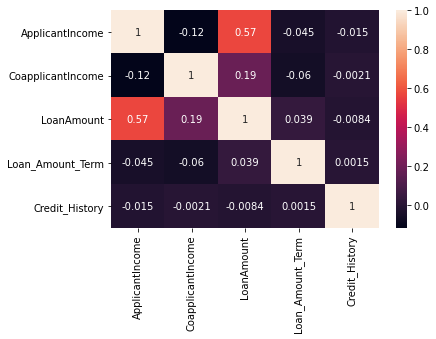

In [253]:
sns.heatmap(data.corr(), annot = True )

In [259]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### There are many missing values and we need to deal with it 

###### First i will fill categorical missing values 

In [279]:
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"]= data["Married"].fillna(data["Married"].mode()[0])

In [284]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [288]:
data["Dependents"] = data["Dependents"].fillna(data["Dependents"].mode()[0])

In [295]:
data["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [306]:
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [321]:
data["Credit_History"] = data["Credit_History"].fillna(data["Credit_History"].mode()[0])

In [330]:
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0])

### As loan amount is can varry person to person with good deviation so we will use either mean or mode 

<AxesSubplot:xlabel='LoanAmount'>

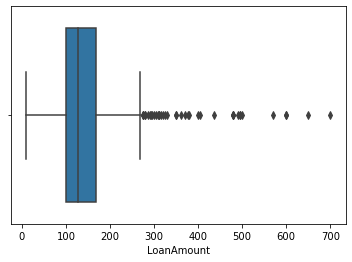

In [335]:
sns.boxplot(x = "LoanAmount", data = data)

##### we can see that some are their outliers so we will use median because it outlier does not effect on median 

In [339]:
data["LoanAmount"] =  data["LoanAmount"].fillna(data["LoanAmount"].median())

In [342]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

####  Now we have done with missing values and next step is label encoding 

# Label Encoding 
### model understands only numeric/tensor data  

In [345]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [347]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [351]:
object_col = data.select_dtypes("object").columns
for col in object_col:
    data[col]=le.fit_transform(data[col])

In [352]:
data.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [353]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### now we need to standarized or normalized the values for better results 

In [357]:
from sklearn.preprocessing import StandardScaler 

In [358]:
cols=['CoapplicantIncome','LoanAmount','ApplicantIncome','Loan_Amount_Term']
sc=StandardScaler()
for col in cols:
    data[col]=sc.fit_transform(data[col].values.reshape(-1,1))
data.head()    

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1
3,3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1
4,4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,1


### Time for Feature Selection 

<AxesSubplot:>

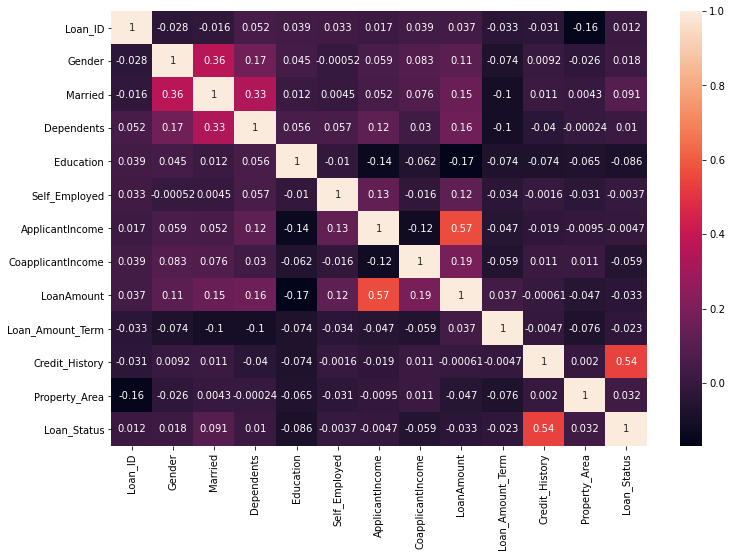

In [363]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot = True)

####  As we can see that Loan_ID and Property Area does not showing any good corelation with any other feature so I am gonna remove them from data because it is abundant 

In [367]:
data.drop(["Loan_ID","Property_Area"], axis =1, inplace = True)

In [369]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,1


In [371]:
x_train = data.drop("Loan_Status", axis = 1)
y_train = data["Loan_Status"]

In [374]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,-0.889500,0.273231,1.0
610,1,1,3,0,0,-0.212557,-0.554487,-1.258378,-2.522836,1.0
611,1,1,1,0,0,0.437174,-0.472404,1.276168,0.273231,1.0
612,1,1,2,0,0,0.357064,-0.554487,0.490816,0.273231,1.0


In [375]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [383]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression

Accuracy on test data  0.7727272727272727
Accuracy on train data  0.8217391304347826
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



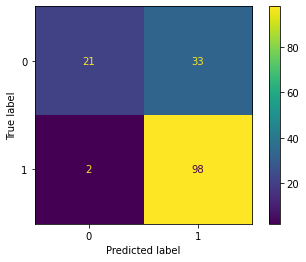

In [391]:
model1=LogisticRegression()
parameters={'penalty':['l2','l1'],'solver':['liblinear'],'C':[1,2,3]}
gscv1=GridSearchCV(model1,param_grid=parameters)
gscv1.fit(x_train,y_train)
y_pred=gscv1.predict(x_test)
cf_r=classification_report(y_test,y_pred)
print('Accuracy on test data ', gscv1.score(x_test,y_test))
print('Accuracy on train data ', gscv1.score(x_train,y_train))
print(plot_confusion_matrix(gscv1,x_test,y_test,values_format='0.3g'))
print('Classification Report :\n',cf_r)


# K-Neighbours Classifier 

Accuracy on test data  0.7402597402597403
Accuracy on train data  1.0
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.33      0.47        54
           1       0.73      0.96      0.83       100

    accuracy                           0.74       154
   macro avg       0.77      0.65      0.65       154
weighted avg       0.76      0.74      0.70       154



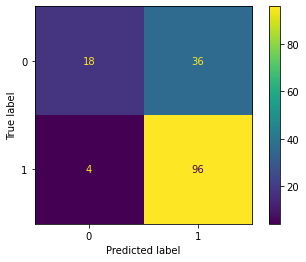

In [393]:
model4=KNeighborsClassifier()
parameters={'n_neighbors':[10,12,14],'weights':['uniform','distance'],'algorithm':['auto']}
gscv4=GridSearchCV(model4,param_grid=parameters)
gscv4.fit(x_train,y_train)
y_pred=gscv4.predict(x_test)
cf_r=classification_report(y_test,y_pred)  
print('Accuracy on test data ', gscv4.score(x_test,y_test))
print('Accuracy on train data ', gscv4.score(x_train,y_train))
print(plot_confusion_matrix(gscv4,x_test,y_test,values_format='0.3g'))
print('Classification Report :\n',cf_r)

In [394]:
gscv4.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}